In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Question and problem definition

### Handling data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
total_data = [train, test]

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hogeboom, Mrs. John C (Anna Andrews)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### We see that:

##### 1. Columns have catergorical values is:
Name, Sex, Ticket, Cabin, Embarked

##### 2. Columns have numerical values is:
PasengerId, Survived, Pclass, Age, SibSp, Parch, Fare

In [8]:
train.info()
print('.'*40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
........................................


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Possible features that don't helful 
- *name* : It's relatively non-standard, may not contribute to survival
- *PassengerId* : may be dropped as it does not contribute to survival
- *cabin* : because it highly incomplete or contains many null value in both training and test dataset
- *Ticket* : because it contains high ratio of duplicates (unique=681) and not be a correlation between ticket and survival

#### Analyze by pivoting features
We can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any emty values. It make sense doing so only for features which are categorical (Sex), ordinal(Pclass) and discrete (SibSp, Parch) type. 
- ***Pclass*** : We observe significant correlation among Pclass=1 and Survived
- ***Sex*** : To confirm the observation during problem definition that Sex=female had very high survival rate
- ***SibSp*** and ***Parch*** : It may be best to derive a feature or a set of features from these individual features.

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[['Parch', 'Survived']].groupby(by='Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train[['SibSp', 'Survived']].groupby(by='SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Assumption
We can observed that:
1. Woman (Sex=female) were more likely to have survived (74%)
2. The upper class (Pclass=1) were more likely to have survied (62.9%)
3. Family have 3,4 member(Parch+SibSp) were more likely to have survived


In [14]:
import seaborn as sns
import random as rnd 
import matplotlib.pyplot as plt
%matplotlib inline

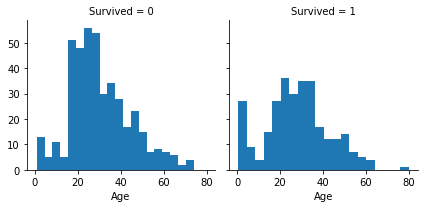

In [15]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

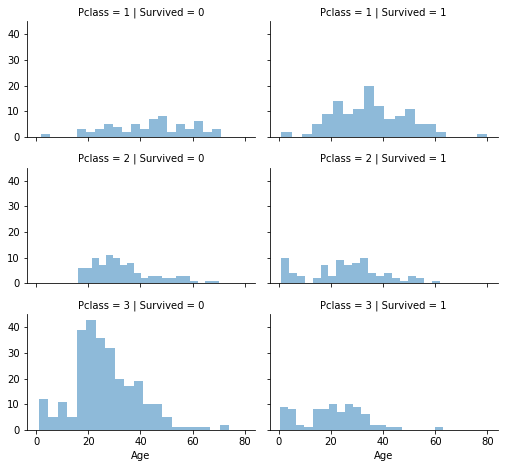

In [16]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

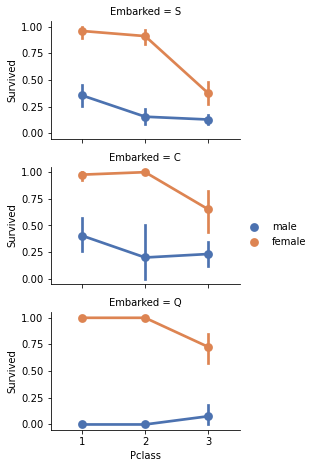

In [17]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1, 2, 3], hue_order=['male', 'female'], palette='deep')
grid.add_legend()

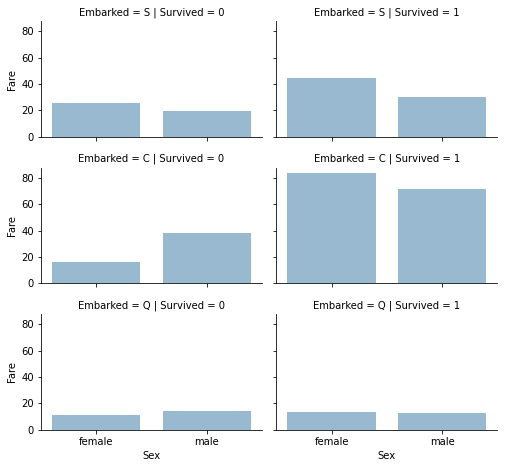

In [18]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=['female', 'male'], alpha=.5, ci=None)
grid.add_legend()

### Wrangle data
1. Correcting by dropping features
2. Creating new feature extracting from existing
3. Converting a categorical feature
4. Completing a numerical continuous feature
5. Create new feature combining existing features
6. Completing a categorical feature
7. Converting categorical feature to numeric
8. Quick completing and converting a numeric feature

We will perform operations on both training and testing dataset

In [19]:
# 1. Base on our assumptions and decisions we want to drop 
# the Cabin and Ticket features

train.shape

(891, 12)

In [20]:
print("Before: ", train.shape, test.shape, total_data[0].shape, total_data[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
total_data = [train, test]

print("After drop: ", train.shape, test.shape, total_data[0].shape, total_data[1].shape)

Before:  (891, 12) (418, 11) (891, 12) (418, 11)
After drop:  (891, 10) (418, 9) (891, 10) (418, 9)


In [21]:
# 2. We want to analyze if Name feature can be engineered to extract titles
# and test correlation between titles and survival, before dropping
# Name and PassengerId features.

for dataset in total_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in total_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Countess', 'Don', 
    'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare":5}
for dataset in total_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
total_data = [train, test]
print(train.shape, test.shape)

(891, 9) (418, 9)


In [25]:
# Now we can convert features which contain strings to numerical values
# Converting feature Sex to new feature called Gender where
# female=1 and male=0

for dataset in total_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


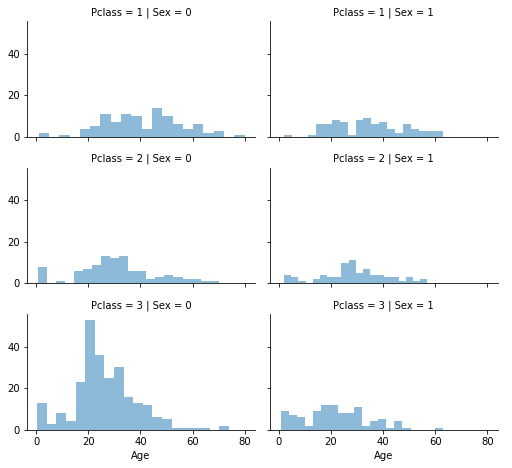

In [26]:
# We should start estimating and completing features with missing
# or null values

# To guessing missing values we use other correlated features.
# In our case we note correlation among Age, Gender, and Pclass
# Guess Age values using median values for Age across sets of Pclass
# and Gender feature combinations

grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [27]:
# We start by preparing an empty array to contain guessed Age
# values based on Pclass x Gender combinations

guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
# Now we iterate over Sex(0 or 1) and Pclass (1,2,3) to calculate guessed
# values of Age for the six combinations

for dataset in total_data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) &
                                (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()

            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) &
                         (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
    
    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [29]:
# Let create Age bands and determine correlations with Survived

train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in total_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [31]:
train = train.drop(['AgeBand'], axis=1)
total_data = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [32]:
# We can create a new feature for FamilySize which combines Parch and SibSp

for dataset in total_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values('Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [33]:
for dataset in total_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [34]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
total_data = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [35]:
for dataset in total_data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [36]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [39]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


In [40]:
test['Title'] = test['Title'].astype(int)

In [41]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values('Survived', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [42]:
for dataset in total_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
total_data = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [43]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


In [45]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [46]:
X_train, X_valid = np.split(X_train.sample(frac=1, random_state=42), [int(0.8*len(X_train))])
Y_train, Y_valid = np.split(Y_train.sample(frac=1, random_state=42), [int(0.8*len(Y_train))])

In [47]:
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
Y_train = Y_train.to_numpy()
Y_valid = Y_valid.to_numpy()
X_test = X_test.to_numpy()

## Model, predict

In [52]:
# Sử dụng hàm Gini (default)
import time
from DecisionTree import *
start_time = time.time()
tree_gini = ClassificationTree()             
tree_gini.fit(X_train, Y_train)
Y_pred = tree_gini.predict(X_valid)
acc_gini = len(Y_valid[Y_valid==Y_pred]) / len(Y_valid) * 100
my_time = time.time() - start_time
print("Kết quả dự đoán của thuật toán tự cài đặt(%): ", acc_gini)
print("Thời gian chạy: ", my_time)

# So sánh với kết quả từ thư viện sklearn (Gini)
from sklearn.tree import DecisionTreeClassifier
s_time = time.time()
decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_valid)
acc_decision_tree = len(Y_valid[Y_valid==Y_pred]) / len(Y_valid) * 100
lib_time = time.time() - s_time
print("Kết quả dự đoán của thư viện: ", acc_decision_tree)
print("Thời gian chạy của thư viện: ", lib_time)

Kết quả dự đoán của thuật toán tự cài đặt(%):  81.00558659217877
Thời gian chạy:  0.33696794509887695
Kết quả dự đoán của thư viện:  81.00558659217877
Thời gian chạy của thư viện:  0.003991127014160156


In [55]:
start_time = time.time()
tree_entropy = ClassificationTree(criterion='Entropy')   # Entropy
tree_entropy.fit(X_train, Y_train)
Y_pred = tree_entropy.predict(X_valid)
acc_entropy = len(Y_valid[Y_valid==Y_pred]) / len(Y_valid) * 100
my_time = time.time() - start_time
print("Kết quả dự đoán của thuật toán tự cài đặt(%): ", acc_entropy)
print("Thời gian chạy: ", my_time)
#-----------------------------------------------------------------------
s_time = time.time()
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(X_train, Y_train)
Y_pred = decision_tree_entropy.predict(X_valid)
acc_decision_tree_entropy = len(Y_valid[Y_valid==Y_pred]) / len(Y_valid) * 100
lib_time = time.time() - s_time
print("Kết quả dự đoán của thư viện: ", acc_decision_tree_entropy)
print("Thời gian chạy của thư viện: ", lib_time)

Kết quả dự đoán của thuật toán tự cài đặt(%):  81.56424581005587
Thời gian chạy:  0.31322360038757324
Kết quả dự đoán của thư viện:  81.56424581005587
Thời gian chạy của thư viện:  0.0029256343841552734
